<div class="alert alert-block alert-danger">
<b>Warning!</b> Disclaimer: The information in this Jupyter Notebook is for educational purposes and does not consitute financial advice. Use of any information in this notebook should be used in conjunction with a Finance subject matter expert.
</div>

<div class="alert alert-block alert-info">
Author:<br>Felix Gonzalez, P.E. <br> Adjunct Instructor, <br> Division of Professional Studies <br> Computer Science and Electrical Engineering <br> University of Maryland Baltimore County <br> fgonzale@umbc.edu
</div>

# Financial Data Analysis Notebook
The objective of this notebook is to introduce the topic of Financial data, data visualization, and modeling.

In [1]:
import pandas as pd # data analysis
import numpy as np # numeric calculation
import datetime

import matplotlib.pyplot as plt # Plotting
%matplotlib inline

from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

import seaborn as sns

# Financial Data

Data science and data analytics approaches are broadly used with Financial data to inform decision-making. This may include data visualization, statsitics, future value prediction, machine learning, and many others. These areas include financial modeling, econometrics, quantiative finance, among many others. To accomplish this, there are many sources of financial data that can be utilized. Financial data used for modeling may include but not limited to:
- Stock price (e.g., open, close, high, low)
- Stock price Trading Volumne and date/times
- Growth percent (e.g., quarter to quarter, year to year, quarter/year to quarter/year)
- Revenue
- Financial Reports (e.g., quarterly, annual)
- Stakeholder Meeting Summaries

Financial Indicators are used to inform decision making and may include but not limited to:
- Earnings per share
- Ratios (e.g., price-to-earnings ratio, r
Return oe Equi, d

Debteto-Equrty R)atio
- Moving average convergence/divergence (MACD) indicator 
- Bollinger Bands
- Momentum
- Percent changes

Models may be qualitative, quantitative or a ,combinatio approachns andsome examples include::
- Time Sedels
- Regresdels
- Economedels
- Machine Leardels
- Market Research
.

This notebook utilizes data from the [Thrift Savings Plan share price historical data](#https://www.tsp.gov/fund-performance/share-price-history/) and data from Standard and Poors (S&P) 500 index to show how some model some financial indicators and use some predictions using Reggression approaches. The data in the input_data folder was downloaded manually from the data sources below. However, many Financial platforms offer Application Programming Interfaces (API) which would allow automating data extraction on a daily or even close to real-time These APIs, can be used to download financial data and run models. For example, here is the documentation of Yahoo Finance API (https://python-yahoofinance.readthedocs.io/en/latest/api.html). However, many of these API's will require registration and obtaining an API key, and in many cases are not free..

### Data Sources:
- S&P 500 Fund, Yahoo, Data Download:  https://finance.yahoo.com/quote/SPY/history?p=SPY
- S&P 500 Fund, Marketwatch: https://www.marketwatch.com/investing/index/spx
- TSP Share Price History: https://www.tsp.gov/fund-performance/share-price-history/
- Financial Information from Companies in S&P500 https://datahub.io/core/s-and-p-500-companies

### Referenc- https://www.kaggle.com/code/lusfernandotorres/data-science-for-financial-marketses:- https://algotrading101.com/learn/robinhood-api-guide/
- https://github.com/jmfernandes/robin_stocks

- https://towardsdatascience.com/aifortrading-2edd6fac
- https://www.investopedia.com/terms/m/macd.asp
- https://www.bluecopa.com/blog/financial-forecasting-methods
- https://www.strike.money/technical-analysis/main-approaches-to-price-forecasting
- https://corporatefinanceinstitute.com/resources/financial-modeling/forecasting-methods/
- https://towardsdatascience.com/aifortrading-2edd6fac689d689d
- https://github.com/borisbanushev/stockpredictionai
- https://medium.com/@financial_python/how-to-plot-bollinger-bands-in-python-1d7cc95ad9af
- https://machinelearningmastery.com/types-of-classification-in-machine-learning/
- https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/
- https://machinelearningmastery.com/imbalanced-classification-with-the-adult-income-data689d

# TSP Data Loading

In [2]:
df_tsp = pd.read_csv('./input_data/tsp_shareprices_3-13-2021.csv')
df_tsp.head(3)

,Date_No,date,Linc,L2025,L2030,L2035,L2040,L2045,L2050,L2055,L2060,L2065,G,F,C,S,I
0,4336,3/12/2021,22.5488,11.4494,40.045,11.983,45.188,12.3448,26.9679,13.1253,13.1252,13.125,16.5409,20.4879,58.8906,83.2910,36.6904
1,4335,3/11/2021,22.5500,11.4474,40.0342,11.9795,45.1723,12.3401,26.9559,13.112,13.1119,13.1118,16.5403,20.5964,58.8159,82.9816,36.7071
2,4334,3/10/2021,22.4903,11.3832,39.7503,11.8861,44.7876,12.2271,26.6921,12.9567,12.9567,12.9565,16.5397,20.5995,58.2064,80.8858,36.4054


In [3]:
df_tsp.columns

Index(['Date_No', 'date', ' Linc', '  L2025', '  L2030', '  L2035', '  L2040',
       '  L2045', '  L2050', '  L2055', '  L2060', '  L2065', '  G', '  F',
       '  C', '  S', '  I'],
      dtype='object')

In [4]:
df_tsp.columns = df_tsp.columns.str.strip() # Fixes leading and lagging spaces in header names.
df_tsp.columns

Index(['Date_No', 'date', 'Linc', 'L2025', 'L2030', 'L2035', 'L2040', 'L2045',
       'L2050', 'L2055', 'L2060', 'L2065', 'G', 'F', 'C', 'S', 'I'],
      dtype='object')

In [5]:
df_tsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336 entries, 0 to 4335
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date_No  4336 non-null   int64  
 1   date     4336 non-null   object 
 2   Linc     4336 non-null   float64
 3   L2025    4336 non-null   object 
 4   L2030    4336 non-null   object 
 5   L2035    4336 non-null   object 
 6   L2040    4336 non-null   object 
 7   L2045    4336 non-null   object 
 8   L2050    4336 non-null   object 
 9   L2055    4336 non-null   object 
 10  L2060    4336 non-null   object 
 11  L2065    4336 non-null   object 
 12  G        4336 non-null   float64
 13  F        4336 non-null   float64
 14  C        4336 non-null   float64
 15  S        4336 non-null   float64
 16  I        4336 non-null   float64
dtypes: float64(6), int64(1), object(10)
memory usage: 576.0+ KB


In [6]:
df_tsp['date'] = pd.to_datetime(df_tsp['date'], format='%m/%d/%Y')
df_tsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336 entries, 0 to 4335
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date_No  4336 non-null   int64         
 1   date     4336 non-null   datetime64[ns]
 2   Linc     4336 non-null   float64       
 3   L2025    4336 non-null   object        
 4   L2030    4336 non-null   object        
 5   L2035    4336 non-null   object        
 6   L2040    4336 non-null   object        
 7   L2045    4336 non-null   object        
 8   L2050    4336 non-null   object        
 9   L2055    4336 non-null   object        
 10  L2060    4336 non-null   object        
 11  L2065    4336 non-null   object        
 12  G        4336 non-null   float64       
 13  F        4336 non-null   float64       
 14  C        4336 non-null   float64       
 15  S        4336 non-null   float64       
 16  I        4336 non-null   float64       
dtypes: datetime64[ns](1), float64(6),

In [7]:
# Converting the Date as the index may improve some calculations.

# Exploratory Data Analysis

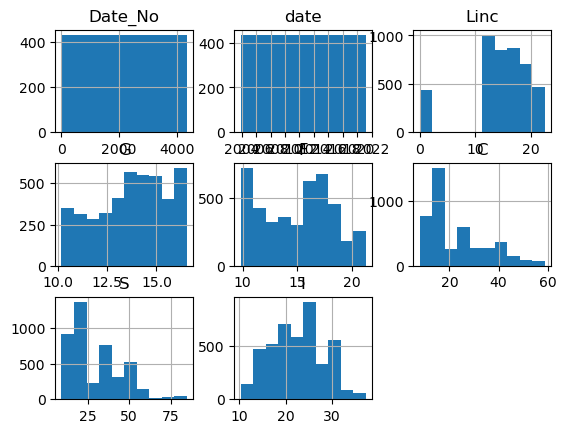

In [8]:
df_tsp.hist();

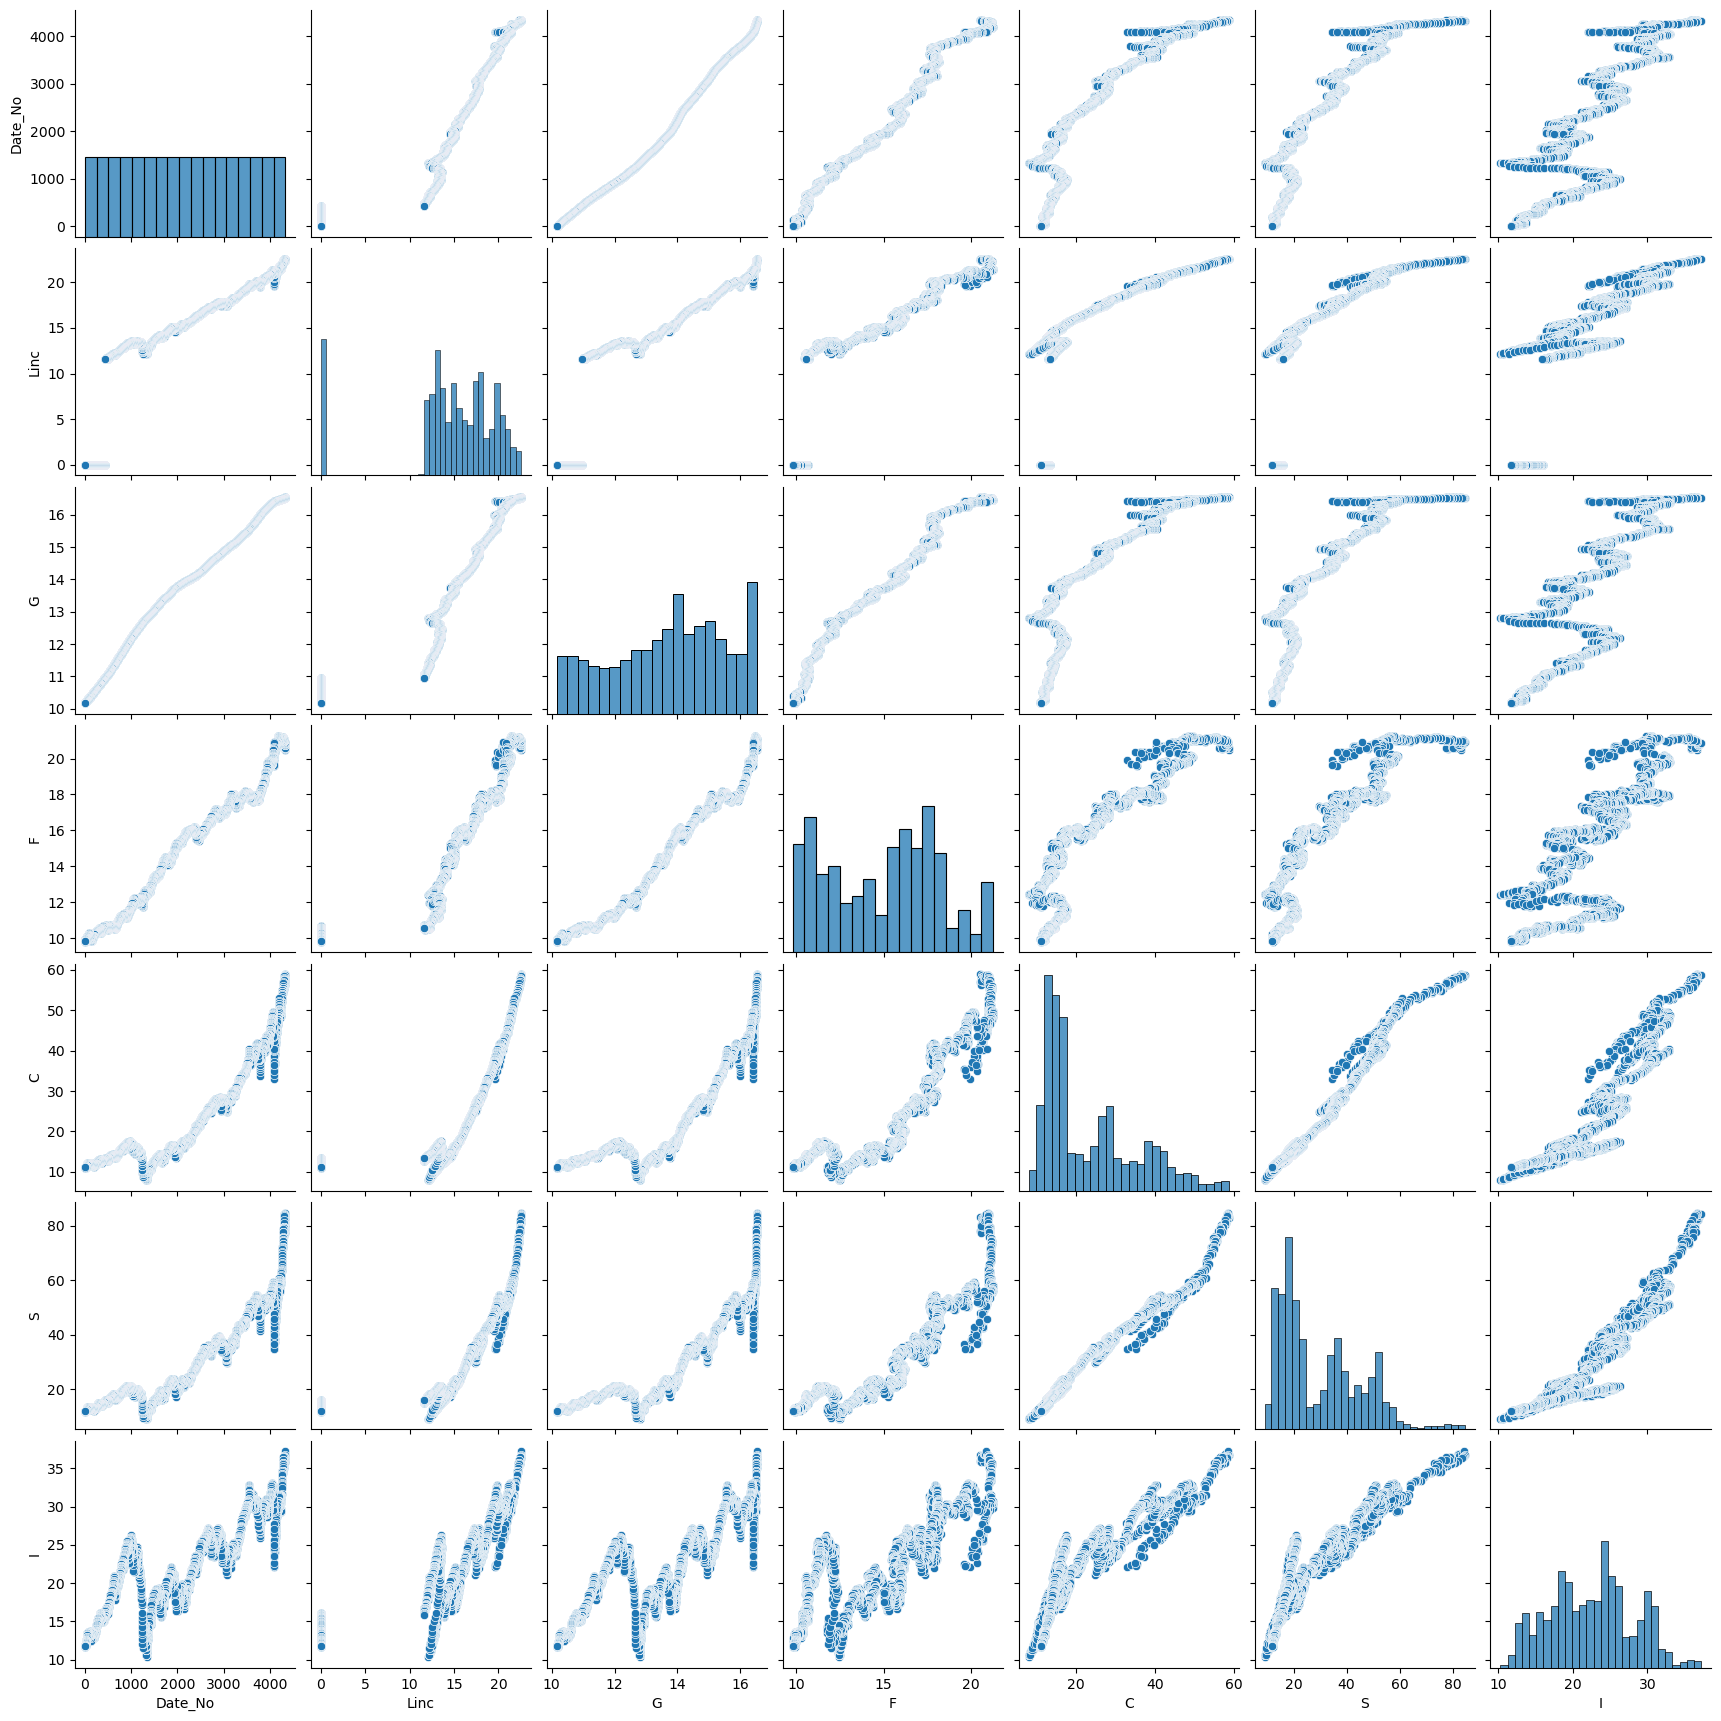

In [9]:
sns.pairplot(df_tsp);

# Custom Functions

The following functions 

### Financial Data Indicators

This functions calculates various financial indicators including moving averages (i.e., 7 and 21 days), moving average convergence/divergence (MACD), Bollinger bands, momentum, and percent difference between price and each indicator.

In [50]:
# Function to create the technical indicators feature data
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['price'].rolling(window=7).mean()
    dataset['ma21'] = dataset['price'].rolling(window=21).mean()
    
    # Create moving average convergence/divergence (MACD) indicator 
    dataset['26ema'] = dataset['price'].ewm(span=26).mean() # Exponential Moving Average function (ewm), 26 days.
    dataset['12ema'] = dataset['price'].ewm(span=12).mean() # Exponential Moving Average function (ewm), 12 days.
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])
    
    # Create Bollinger Bands
    dataset['20sd'] = dataset['price'].rolling(20).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['price'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['price']-1
    # Create Log of Momentum
    dataset['log_momentum'] = np.log(dataset['momentum']) 
    
    # Calculating the Percent Difference (scaled as a percent) between the Price and 21 days moving average (ma21)
    dataset['perc_diff_price_ma7'] = 100*(dataset['price']-dataset['ma7'])/dataset['price']
    dataset['perc_diff_price_ma21'] = 100*(dataset['price']-dataset['ma21'])/dataset['price']
    dataset['perc_diff_price_upper_band'] = 100*(dataset['price']-dataset['upper_band'])/dataset['price']
    dataset['perc_diff_price_lower_band'] = 100*(dataset['price']-dataset['lower_band'])/dataset['price']
    
    return dataset

### Plotting Functions

Plotting functions plot various plots including a plot with price and all financial indicators calculated above and separate plots for the percent change. The various functions here may include interacting with a date or day range (star/end days) or using the last days.

In [29]:
# Plotting all features (e.g., with technical indicators.)
def plot_technical_indicators(dataset, last_days, include_pct_change):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0] # Used in second subplot for horizontal lines
    xmacd_ = shape_0-last_days # Used in second subplot for horizontal lines
    
    dataset = dataset.iloc[-last_days:, :] # Filters data
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['price'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for Fund - last {} days.'.format(last_days))
    plt.ylabel('Share Price')
    plt.legend()

    if include_pct_change == 'Yes':
        # Plot second subplot
        plt.figure(figsize=(16, 10), dpi=100)
        plt.subplot(2, 1, 1)
        plt.plot(dataset['perc_diff_price_ma7'], label='perc_diff_price_ma7', color='g',linestyle='--')
        plt.title(f'Percent Change')
        plt.axhline(y=0, color='r', linestyle='--')
        plt.ylabel('% Change')
    
        plt.legend()
        plt.show();
    
        plt.figure(figsize=(16, 10), dpi=100)
        plt.subplot(2, 1, 1)
        plt.plot(dataset['perc_diff_price_ma21'], label='perc_diff_price_ma21', color='g',linestyle='--')
        plt.title(f'Percent Change')
        plt.axhline(y=0, color='r', linestyle='--')
        plt.ylabel('% Change')
    
        plt.legend()
        plt.show();

        plt.figure(figsize=(16, 10), dpi=100)
        plt.subplot(2, 1, 1)
        plt.plot(dataset['perc_diff_price_lower_band'], label='perc_diff_price_lower_band', color='g',linestyle='--')
        plt.title(f'Percent Change')
        plt.axhline(y=0, color='r', linestyle='--')
        plt.ylabel('% Change')
    
        plt.legend()
        plt.show();
    
        plt.figure(figsize=(16, 10), dpi=100)
        plt.subplot(2, 1, 1)
        plt.plot(dataset['perc_diff_price_upper_band'], label='perc_diff_price_upper_band', color='g',linestyle='--')
        plt.title(f'Percent Change')
        plt.axhline(y=0, color='r', linestyle='--')
        plt.ylabel('% Change')
    
        plt.legend()
        plt.show();

In [30]:
# Plotting all features (e.g., with technical indicators.)
def plot_technical_indicators_between_days(dataset, start_days, end_days, include_pct_change):
    plt.figure(figsize=(16, 10), dpi=100)
    
    dataset = dataset.iloc[start_days:end_days, :] # Filters data
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['price'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title(f'Technical indicators for Fund - between {start_days} and {end_days} days (max days between index 0 and {dataset.shape[0]}.')
    plt.ylabel('Share Price')
    plt.legend()

    plt.legend()
    plt.show()

    if include_pct_change == 'Yes': # Shows percentage change plots.
        plt.figure(figsize=(16, 10), dpi=100)
        plt.subplot(2, 1, 1)
        plt.plot(dataset['perc_diff_price_ma7'], label='perc_diff_price_ma7', color='g',linestyle='--')
        plt.title(f'Percent Change')
        plt.axhline(y=0, color='r', linestyle='--')
        plt.ylabel('% Change')
    
        plt.legend()
        plt.show();
    
        plt.figure(figsize=(16, 10), dpi=100)
        plt.subplot(2, 1, 1)
        plt.plot(dataset['perc_diff_price_ma21'], label='perc_diff_price_ma21', color='g',linestyle='--')
        plt.title(f'Percent Change')
        plt.axhline(y=0, color='r', linestyle='--')
        plt.ylabel('% Change')
    
        plt.legend()
        plt.show();

        plt.figure(figsize=(16, 10), dpi=100)
        plt.subplot(2, 1, 1)
        plt.plot(dataset['perc_diff_price_lower_band'], label='perc_diff_price_lower_band', color='g',linestyle='--')
        plt.title(f'Percent Change')
        plt.axhline(y=0, color='r', linestyle='--')
        plt.ylabel('% Change')
    
        plt.legend()
        plt.show();
    
        plt.figure(figsize=(16, 10), dpi=100)
        plt.subplot(2, 1, 1)
        plt.plot(dataset['perc_diff_price_upper_band'], label='perc_diff_price_upper_band', color='g',linestyle='--')
        plt.title(f'Percent Change')
        plt.axhline(y=0, color='r', linestyle='--')
        plt.ylabel('% Change')
    
        plt.legend()
        plt.show();

In [31]:
# Plotting all features (e.g., with technical indicators.)
def plot_technical_indicators_between_dates(dataset, start_date, end_date):
    plt.figure(figsize=(16, 10), dpi=100)
    
    dataset = dataset.loc[dataset['date'] > start_date : dataset['date'] < end_date, :]
    #x_ = range(3, dataset.shape[0]) # Not sure what this is doing if anything.
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['price'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title(f'Technical indicators for Fund - between {start_date} and {end_date} date.')
    plt.ylabel('Share Price')
    plt.legend()

    plt.show()

In [32]:
# Plotting all features (e.g., with technical indicators.)
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0] # Used in second subplot for horizontal lines
    xmacd_ = shape_0-last_days # Used in second subplot for horizontal lines
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0]) # Not sure what this is doing if anything.
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['price'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for TSP Fund C - last {} days.'.format(last_days))
    plt.ylabel('Share Price')
    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['log_momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

# Data Filtering

In [33]:
df_tsp_C = df_tsp[['date', 'C']].copy()
df_tsp_C = df_tsp_C.rename(columns={"C": "price"})
df_tsp_C = df_tsp_C.sort_values(by = ['date'], ascending = True)
df_tsp_C.head(3)

,date,price
4335,2003-11-03,11.06
4334,2003-11-04,11.00
4333,2003-11-05,10.99


In [34]:
df_tsp_C.describe()

,date,price
count,4336,4336.000000
mean,2012-07-07 11:06:31.881918976,23.344685
min,2003-11-03 00:00:00,7.867300
25%,2008-03-06 18:00:00,13.890000
50%,2012-07-05 12:00:00,17.375150
75%,2016-11-07 06:00:00,29.924100
max,2021-03-12 00:00:00,58.890600
std,NaN,11.875349


In [35]:
df_tsp_C = get_technical_indicators(df_tsp_C)
df_tsp_C = df_tsp_C.reset_index(drop = True)
df_tsp_C

,date,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,perc_diff_price_ma7,perc_diff_price_ma21,perc_diff_price_upper_band,perc_diff_price_lower_band
0,2003-11-03,11.0600,NaN,NaN,11.060000,11.060000,0.000000,NaN,NaN,NaN,11.060000,10.0600,2.308567,NaN,NaN,NaN,NaN
1,2003-11-04,11.0000,NaN,NaN,11.028846,11.027500,-0.001346,NaN,NaN,NaN,11.015000,10.0000,2.302585,NaN,NaN,NaN,NaN
2,2003-11-05,10.9900,NaN,NaN,11.014889,11.012864,-0.002025,NaN,NaN,NaN,10.997692,9.9900,2.301585,NaN,NaN,NaN,NaN
3,2003-11-06,11.0500,NaN,NaN,11.024705,11.024586,-0.000118,NaN,NaN,NaN,11.033000,10.0500,2.307573,NaN,NaN,NaN,NaN
4,2003-11-07,11.0000,NaN,NaN,11.018975,11.017906,-0.001069,NaN,NaN,NaN,11.010909,10.0000,2.302585,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4331,2021-03-08,57.0422,57.41049,57.000590,57.405219,57.406160,0.000941,0.711632,58.423854,55.577326,57.059862,56.0422,4.026105,-0.645645,0.072946,-2.422162,2.568054
4332,2021-03-09,57.8543,57.40543,57.059426,57.438484,57.475105,0.036621,0.703155,58.465736,55.653116,57.589487,56.8543,4.040492,0.775863,1.373924,-1.056855,3.804703
4333,2021-03-10,58.2064,57.36976,57.121306,57.495367,57.587612,0.092245,0.700269,58.521845,55.720767,58.000762,57.2064,4.046666,1.437368,1.864218,-0.541942,4.270377
4334,2021-03-11,58.8159,57.53761,57.185758,57.593184,57.776579,0.183395,0.726552,58.638861,55.732655,58.544187,57.8159,4.057264,2.173375,2.771601,0.301005,5.242197


In [36]:
# Date Ranges
min_date = df_tsp_C['date'].min()
max_date = df_tsp_C['date'].max()
print(f'The date range is {min_date} to {max_date}.')

The date range is 2003-11-03 00:00:00 to 2021-03-12 00:00:00.


In [37]:
# There are 20 rows with ma21 as nan.
ma21_nan_rows = df_tsp_C['ma21'].isna().sum()
print(f'Rows with nan values in ma21 column = {ma21_nan_rows} and the shape is {df_tsp_C.shape}.')

Rows with nan values in ma21 column = 49 and the shape is (4336, 17).


In [38]:
# Removing those rows and rechecking the nan_rows and shape.
df_tsp_C = df_tsp_C.dropna(subset = ['ma21'])
ma21_nan_rows = df_tsp_C['ma21'].isna().sum()
print(f'Rows with nan values in ma21 column = {ma21_nan_rows} and the shape is {df_tsp_C.shape}.')

Rows with nan values in ma21 column = 0 and the shape is (4287, 17).


In [39]:
df_tsp_C.isnull().sum() # If need to Check uncomment

date                          0
price                         0
ma7                           0
ma21                          0
26ema                         0
12ema                         0
MACD                          0
20sd                          0
upper_band                    0
lower_band                    0
ema                           0
momentum                      0
log_momentum                  0
perc_diff_price_ma7           0
perc_diff_price_ma21          0
perc_diff_price_upper_band    0
perc_diff_price_lower_band    0
dtype: int64

In [40]:
df_tsp_C.describe()

,date,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum,perc_diff_price_ma7,perc_diff_price_ma21,perc_diff_price_upper_band,perc_diff_price_lower_band
count,4287,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000,4287.000000
mean,2012-08-12 06:46:46.438068480,23.482672,23.434167,23.218556,23.348186,23.423359,0.075173,0.364085,23.946727,22.490385,23.477196,22.482672,2.983868,0.140509,0.786053,-2.413754,3.985860
min,2004-01-15 00:00:00,7.867300,8.230450,9.167284,8.787642,8.383304,-3.455802,0.054830,9.644213,7.979732,7.904025,6.867300,1.926771,-18.699661,-37.985599,-65.321971,-18.842123
25%,2008-04-29 12:00:00,13.963150,13.969040,13.895987,13.929132,13.952639,-0.030887,0.171239,14.222998,13.533473,13.967908,12.963150,2.562111,-0.553170,-0.567993,-3.359676,2.021916
50%,2012-08-09 00:00:00,17.533900,17.426800,17.184830,17.265441,17.432090,0.087465,0.261271,17.727316,16.750318,17.504054,16.533900,2.805413,0.381029,1.603993,-0.739215,3.776733
75%,2016-11-26 12:00:00,30.286200,30.117320,29.670732,29.770569,30.033777,0.200168,0.416884,30.421419,29.245308,30.279850,29.286200,3.377116,1.118642,3.279188,0.860830,5.934340
max,2021-03-12 00:00:00,58.890600,58.389590,57.254178,57.689289,58.125301,1.364061,4.491338,58.759379,55.748977,58.775129,57.890600,4.058555,7.916180,12.678259,7.351526,18.813368
std,NaN,11.872228,11.819887,11.592786,11.723229,11.805367,0.304003,0.372613,12.015533,11.203709,11.865429,11.872228,0.500338,1.844121,4.359606,6.331465,3.330678


### Feature Correlation

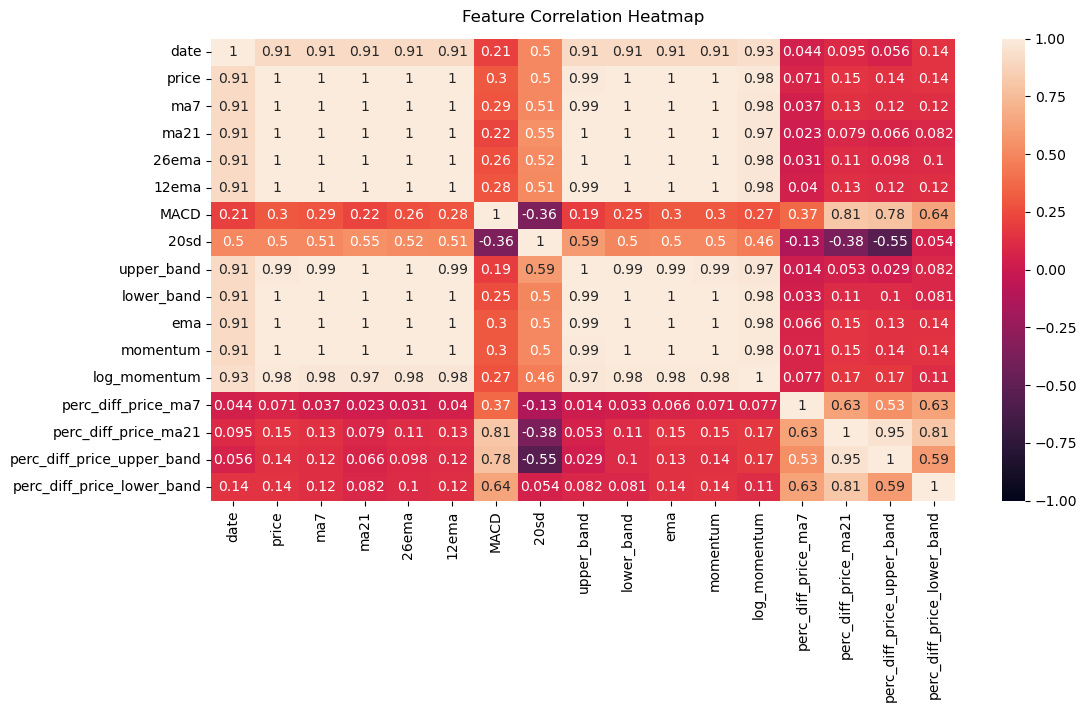

In [41]:
corr_matrix = df_tsp_C.corr()
plt.figure(figsize = (12, 6))
heatmap = sns.heatmap(df_tsp_C.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Feature Correlation Heatmap', fontdict = {'fontsize':12}, pad = 12);
# Note that many indicators here are highly correlated which may indicate multi-collinearity.
# Using features that may have multi-collinearity should be avoided in a machine learning model.

In [42]:
# If export is needed uncomment.
df_tsp_C.to_csv(r'output_data/df_tsp_C.csv', index = False)

# Visualization and Plots

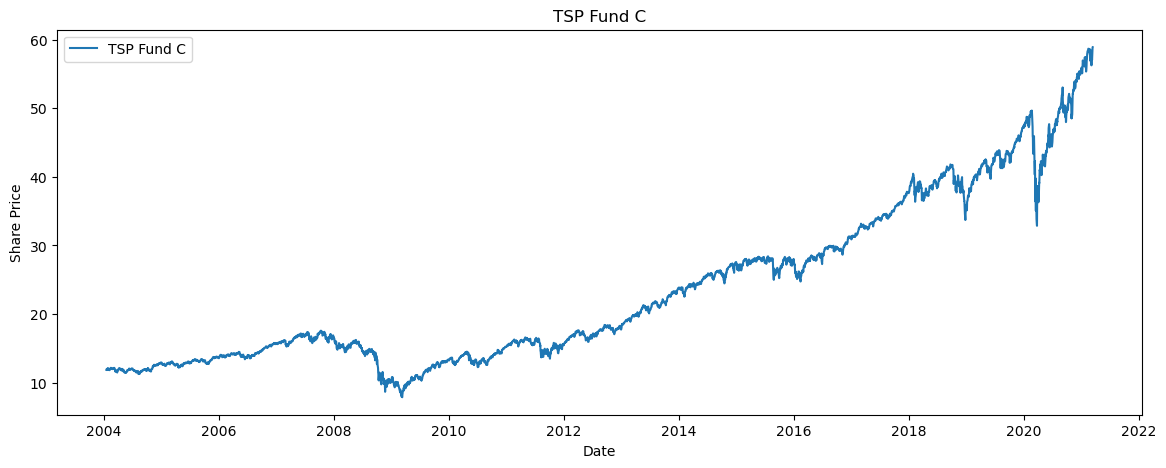

In [43]:
# Plotting all the share price data of TSP Fund C. 
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(df_tsp_C['date'], df_tsp_C['price'], label='TSP Fund C')
#plt.vlines(datetime.date(2016,4, 20), 0, 270, linestyles='--', colors='gray', label='Train/Test data cut-off') # Used to create a dashed vertical line at the specific date.
plt.xlabel('Date')
plt.ylabel('Share Price')
plt.title('TSP Fund C')
plt.legend()
plt.show()

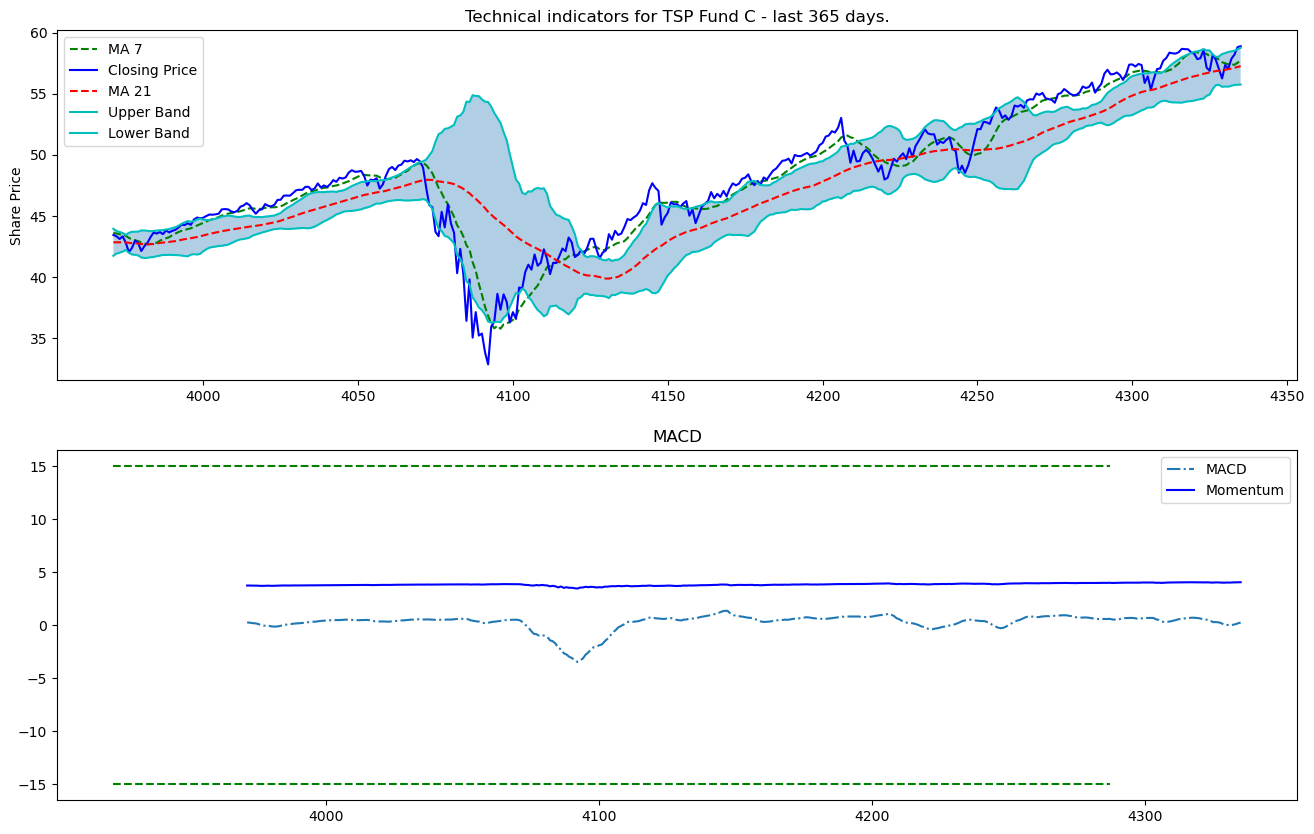

In [44]:
# Plotting the last X days data with the technical inicators.
plot_technical_indicators(df_tsp_C, 365)

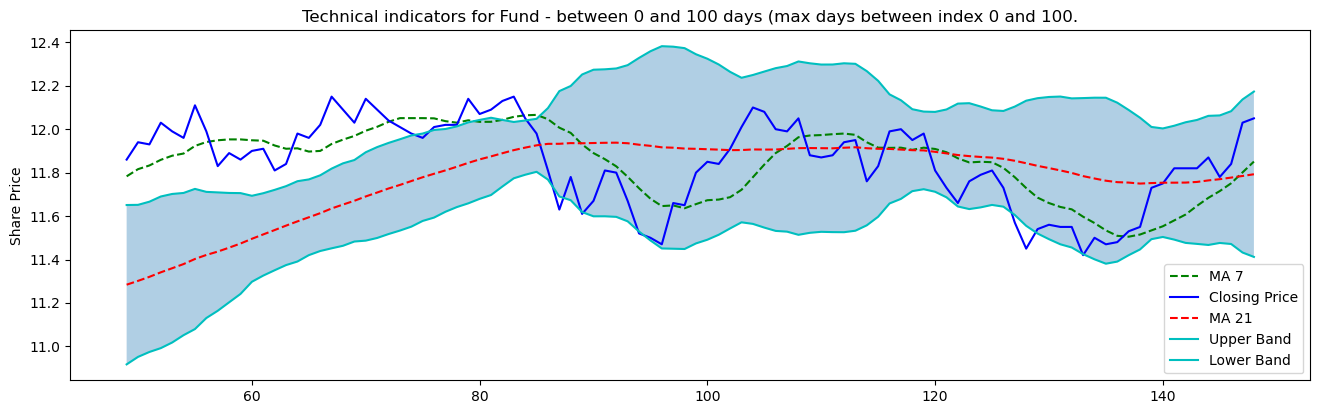

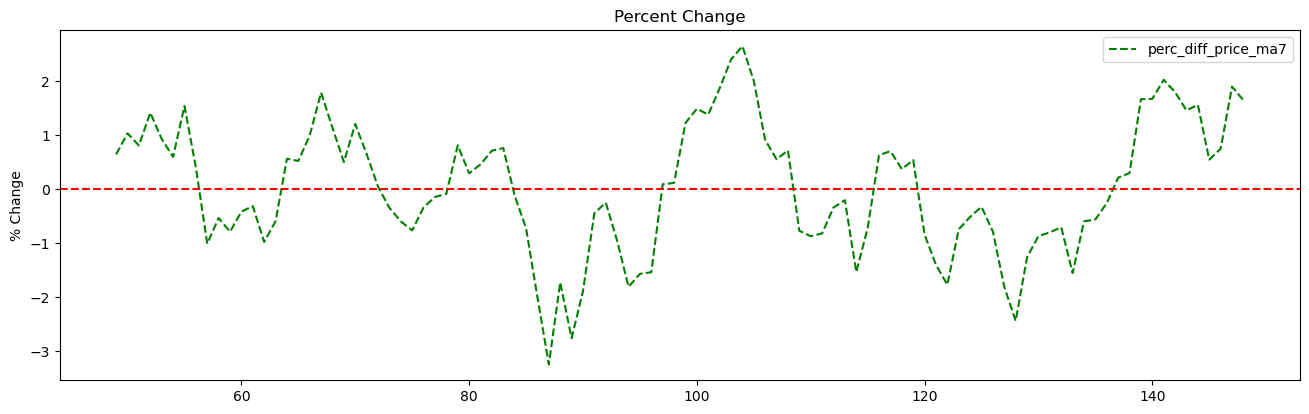

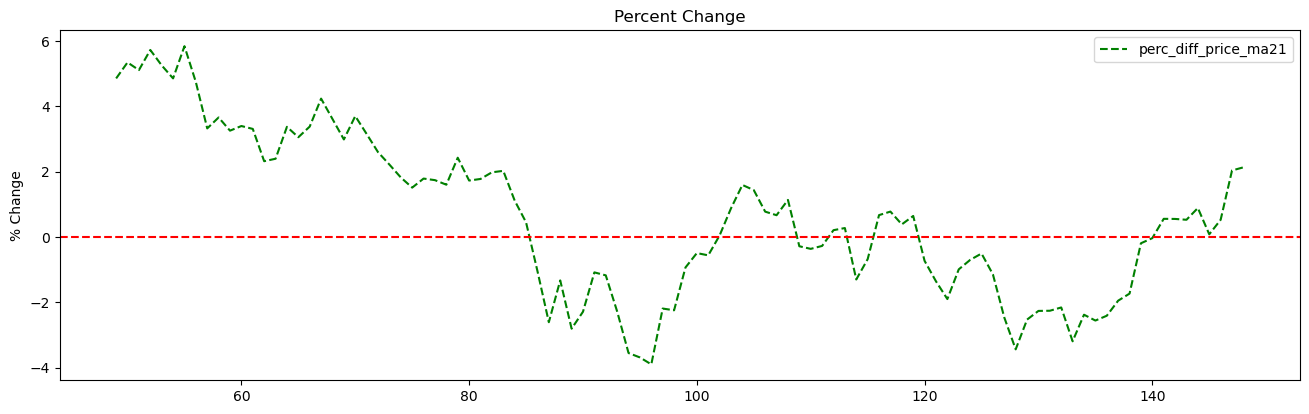

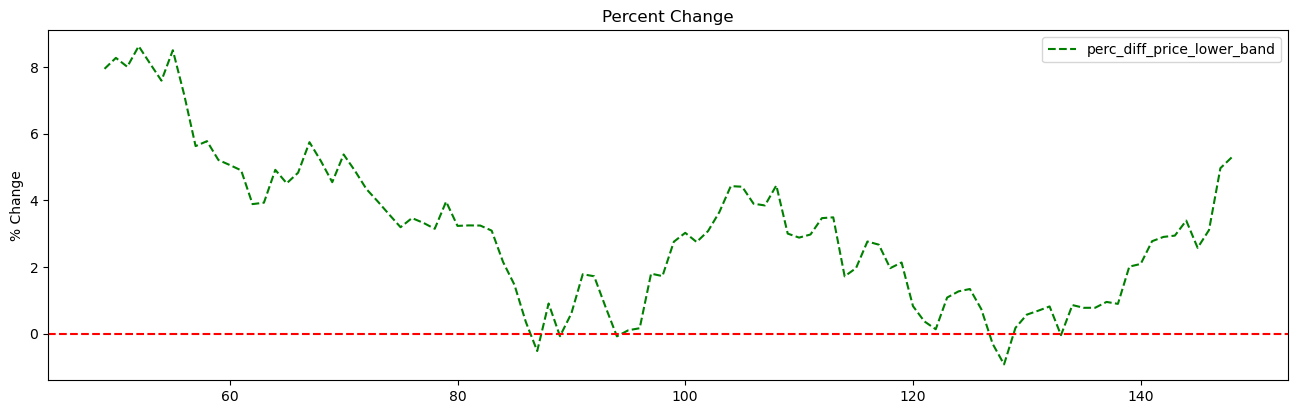

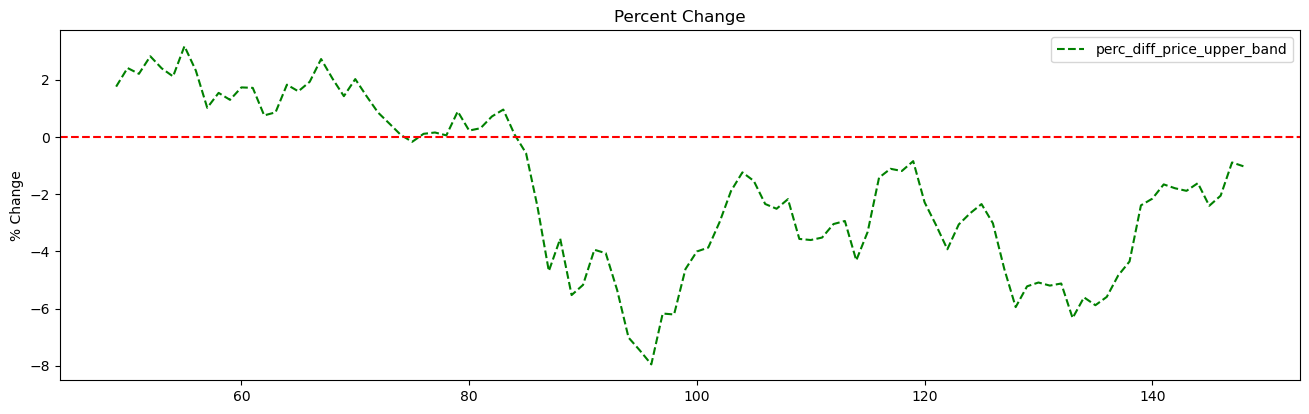

In [48]:
# Plotting all the data with indicators between specific items range.
plot_technical_indicators_between_days(df_tsp_C, 0, 100, include_pct_change = 'Yes') # Could change format to actual dates.

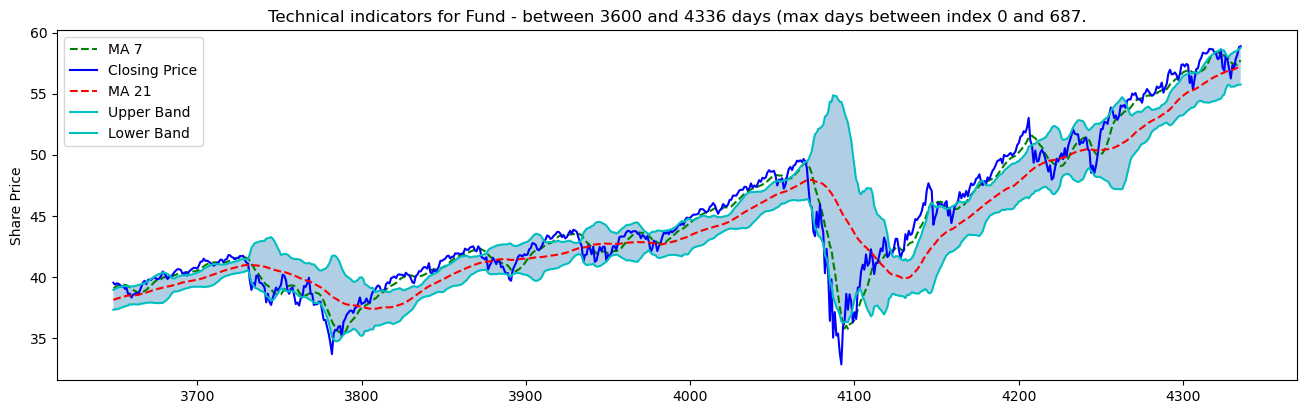

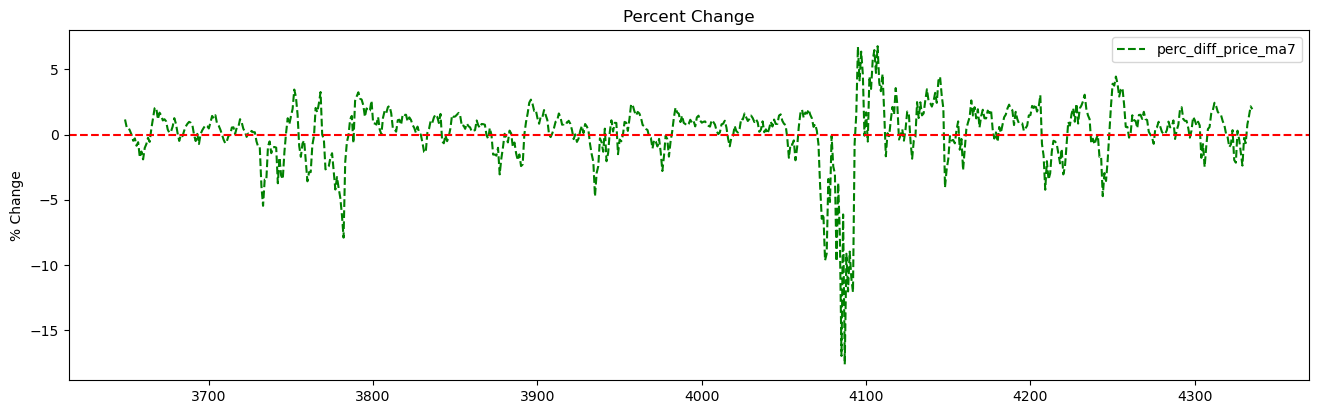

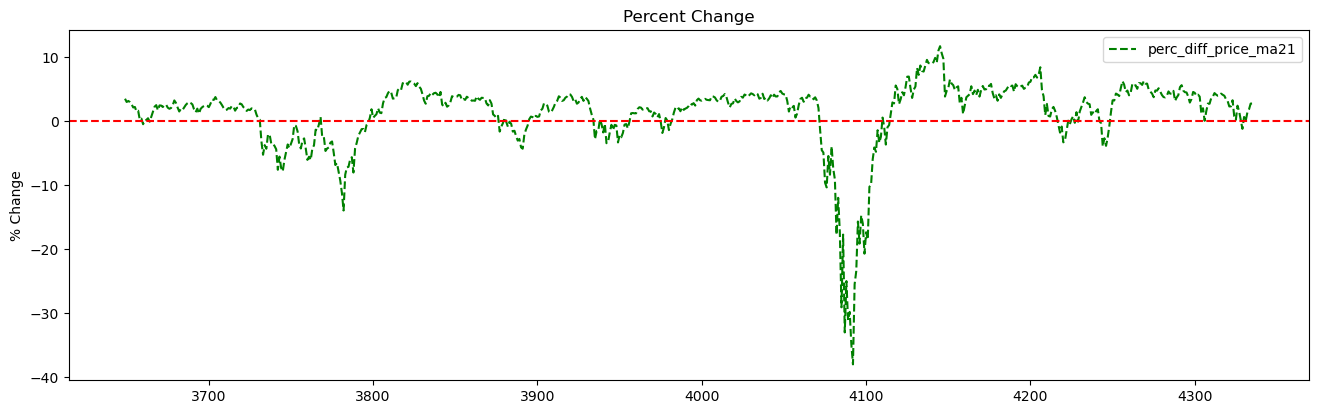

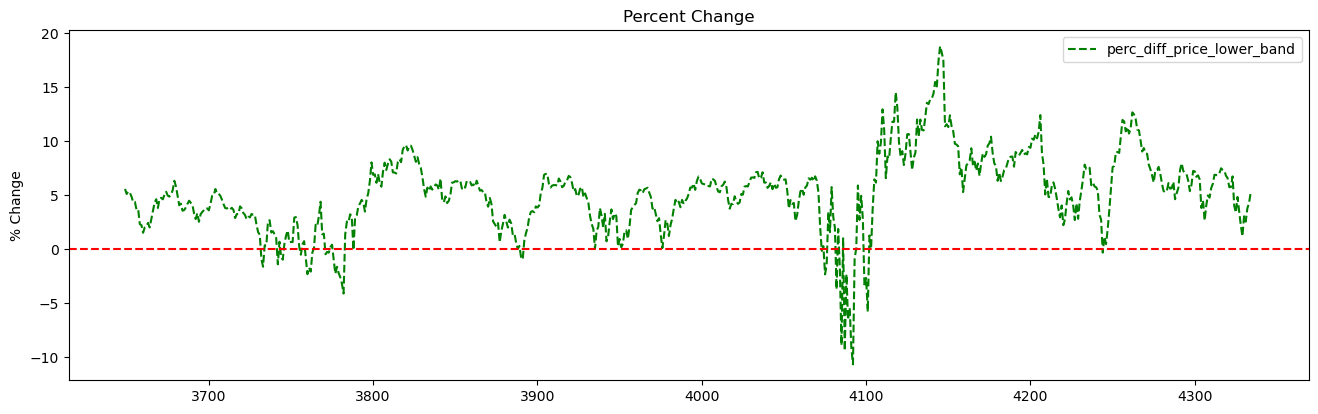

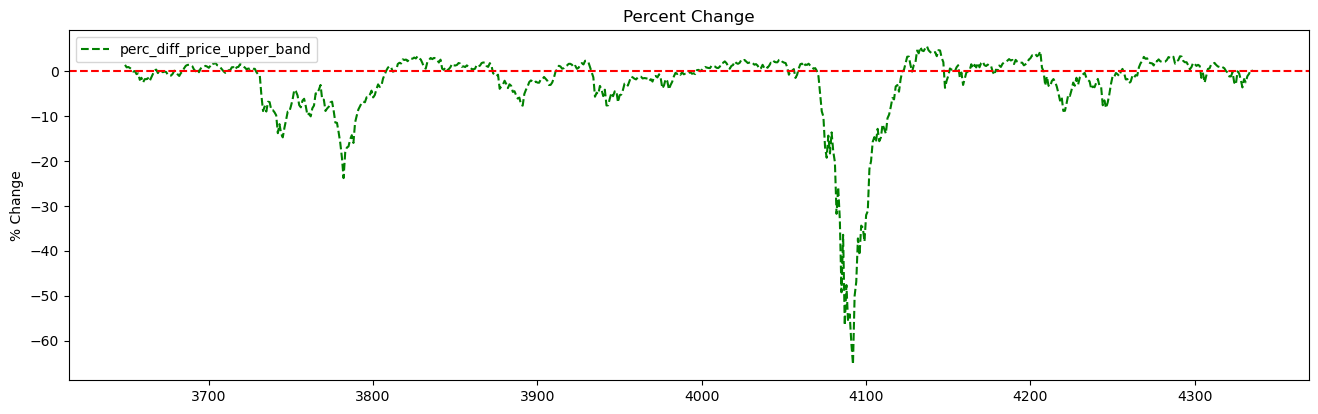

In [49]:
plot_technical_indicators_between_days(df_tsp_C, 3600, 4336, include_pct_change = 'Yes') # Change format to actual dates.

<div class="alert alert-block alert-danger">
<b>Warning!</b> Disclaimer: The information in this Jupyter Notebook is for educational purposes and does not consitute financial advice. Use of any information in this notebook should be used in conjunction with a Finance subject matter expert.
</div>

# NOTEBOOK END